# Machine Learning (dataset double)

First let's import the necessary packages:

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV, train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.pipeline import Pipeline
import pickle
import matplotlib.pylab as plt
plt.rcParams['figure.figsize'] = 7, 7
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') # this is just to avoid showing any warnings here in the notebook

# Let's fix the numpy random seed to ensure reproducibility of results
seed = 123 # any number
np.random.seed(seed)

Next we will load the dataset.

In [2]:
# load and preprocess the dataset
dataframe = pd.read_csv('ML_dataset_double.csv', index_col=0)
dataframe # view the dataset

,target,length,charge,chargedensity,formulaC,formulaH,formulaN,formulaO,formulaS,tot,...,IsoelectricPoint,Instability_index,SecStruct_helix,SecStruct_turn,SecStruct_sheet,Molar_extinction_coefficient_reduced,Molar_extinction_coefficient_oxidized,aliphatic_index,bomanindex,hydrophobic_ratio
accession_id,,,,,,,,,,,,,,,,,,,,,
XBA09021.1,1,92.0,1.064,0.000102,465,726,118,143,3,1687,...,7.761671,17.880435,0.336957,0.206522,0.434783,16960,17085,82.717391,1.471087,0.358696
XAV38393.1,1,131.0,5.203,0.000353,655,1039,177,197,2,2388,...,9.644100,36.342748,0.312977,0.297710,0.366412,17990,17990,93.587786,1.597939,0.358779
XAV38170.1,1,220.0,4.001,0.000165,1055,1658,302,324,11,3882,...,8.972855,32.338182,0.313636,0.322727,0.318182,39420,39545,80.818182,1.677636,0.381818
WWT34990.1,1,341.0,14.853,0.000395,1647,2528,468,515,6,6007,...,9.569832,26.605279,0.269795,0.316716,0.328446,56840,56965,70.117302,1.828974,0.322581
WVX91681.1,1,169.0,7.200,0.000355,917,1418,238,273,3,3231,...,9.271988,23.445562,0.313609,0.266272,0.396450,29340,29340,76.627219,2.511006,0.289941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WP_118376275.1,0,390.0,-3.736,-0.000086,1899,3007,527,589,16,6946,...,5.693528,43.704872,0.333333,0.287179,0.338462,51910,51910,84.846154,1.805333,0.382051
AME02668.1,0,108.0,-0.960,-0.000078,552,883,151,163,2,2003,...,5.852109,66.590741,0.305556,0.240741,0.407407,22460,22460,101.851852,1.880093,0.370370
RHO66229.1,0,105.0,3.736,0.000304,542,856,146,161,8,1992,...,8.911997,43.979238,0.333333,0.180952,0.390476,18450,18700,66.761905,2.168476,0.361905


First we will do an exploratory analysis of the dataset.

In [3]:
dataframe.describe(include='all') # some statistics

,target,length,charge,chargedensity,formulaC,formulaH,formulaN,formulaO,formulaS,tot,...,IsoelectricPoint,Instability_index,SecStruct_helix,SecStruct_turn,SecStruct_sheet,Molar_extinction_coefficient_reduced,Molar_extinction_coefficient_oxidized,aliphatic_index,bomanindex,hydrophobic_ratio
count,8274.000000,8274.000000,8274.000000,8274.000000,8274.000000,8274.000000,8274.000000,8274.000000,8274.000000,8274.000000,...,8274.000000,8274.000000,8274.000000,8274.000000,8274.000000,8274.000000,8274.000000,8274.000000,8274.000000,8274.000000
mean,0.333333,348.745830,-4.730383,-0.000110,1681.892555,2617.985255,455.605270,533.300338,10.067198,6132.058738,...,6.378597,33.522244,0.314562,0.296658,0.353151,49113.443316,49229.998187,82.077336,1.624440,0.366080
std,0.471433,212.897365,12.016869,0.000338,998.734628,1561.929324,272.857278,324.737384,6.399552,3658.306218,...,1.820908,9.572973,0.045915,0.037366,0.033707,34143.977000,34191.526790,10.735729,0.388181,0.038486
min,0.000000,30.000000,-224.755000,-0.002450,158.000000,265.000000,44.000000,37.000000,1.000000,585.000000,...,4.050028,-3.770526,0.109159,0.131868,0.111473,0.000000,0.000000,39.805825,-0.834640,0.189320
25%,0.000000,192.000000,-10.635500,-0.000297,932.250000,1446.000000,249.000000,291.000000,6.000000,3393.000000,...,4.979914,27.044859,0.283723,0.275153,0.330357,25440.000000,25565.000000,75.431706,1.393009,0.342105
50%,0.000000,340.000000,-4.934500,-0.000136,1652.000000,2554.000000,444.000000,516.000000,9.000000,6012.000000,...,5.605626,33.422821,0.315789,0.295693,0.352222,42860.000000,42985.000000,81.828519,1.629443,0.364754
75%,1.000000,441.000000,1.661000,0.000061,2136.000000,3328.750000,580.000000,679.000000,13.000000,7780.750000,...,7.917443,39.700833,0.344371,0.319486,0.375000,63830.000000,64080.000000,88.304502,1.872364,0.389889
max,1.000000,2537.000000,62.530000,0.002364,12109.000000,19132.000000,3368.000000,3887.000000,90.000000,44425.000000,...,11.928859,80.191011,0.571429,0.631068,0.600000,342310.000000,343060.000000,143.923077,3.406525,0.714286


In [4]:
dataframe.isna().sum() # see if there are any columns with missing values

target                                   0
length                                   0
charge                                   0
chargedensity                            0
formulaC                                 0
formulaH                                 0
formulaN                                 0
formulaO                                 0
formulaS                                 0
tot                                      0
hydrogen                                 0
single                                   0
double                                   0
MW_modlamp                               0
Gravy                                    0
Aromacity                                0
IsoelectricPoint                         0
Instability_index                        0
SecStruct_helix                          0
SecStruct_turn                           0
SecStruct_sheet                          0
Molar_extinction_coefficient_reduced     0
Molar_extinction_coefficient_oxidized    0
aliphatic_i

## Train and Test sets split

Let's now separate the input variables from the output variable:

In [5]:
X = dataframe.drop('target', axis=1)
y = dataframe['target'].values # this way you get the numpy array from the pandas Series object

Later on, we will use *k-fold* cross-validation (*k-fold cross-validation*) to validate the models, also maintaining an "external" test set for the final evaluation. In *k-fold* cross validation, the data is divided into k different sets (*folds*). For each fold (from 1 to k), this *fold* is used as a test set to evaluate the model that is trained using data from the remaining folds. (This <a href="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png">image</a> makes it clearer.)

For now let's divide the original dataset into two sets (training and testing).

This in scikit-learn can be done using <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split">train_test_split</a>.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y) 
# stratify = y ensures that data is split proportionally between the positive and negative entries

Check each set dimensions:

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5791, 25)
(2483, 25)
(5791,)
(2483,)


## Unsupervised Learning

Data scalling

In [8]:
scaler = StandardScaler()
dataframe_scaled = scaler.fit_transform(dataframe)
dataframe_scaled

array([[ 1.41421356, -1.20603347,  0.48221659, ...,  0.05962275,
        -0.39507891, -0.19189507],
       [ 1.41421356, -1.02283554,  0.82666987, ...,  1.07222763,
        -0.06827328, -0.18973899],
       [ 1.41421356, -0.60476846,  0.72663778, ..., -0.11729343,
         0.13704926,  0.40894481],
       ...,
       [-0.70710678, -1.14496749,  0.70458411, ..., -1.42667131,
         1.40158785, -0.10850622],
       [-0.70710678, -0.93358526,  0.81252224, ..., -1.02567181,
         1.43385264, -0.33123515],
       [-0.70710678, -1.16375702, -0.34425493, ...,  2.71174326,
        -0.99654441,  2.06487723]])

Principal Component Analysis (PCA)

In [9]:
pca = PCA(n_components=3, random_state=0)
X_r_pca = pca.fit(dataframe_scaled).transform(dataframe_scaled)

In [10]:
print(pca.explained_variance_ratio_)
pca.explained_variance_ratio_.sum()

[0.46587778 0.16367276 0.09941177]


0.7289623059589438

2-Component (2D) Principal Component Analysis (PCA)

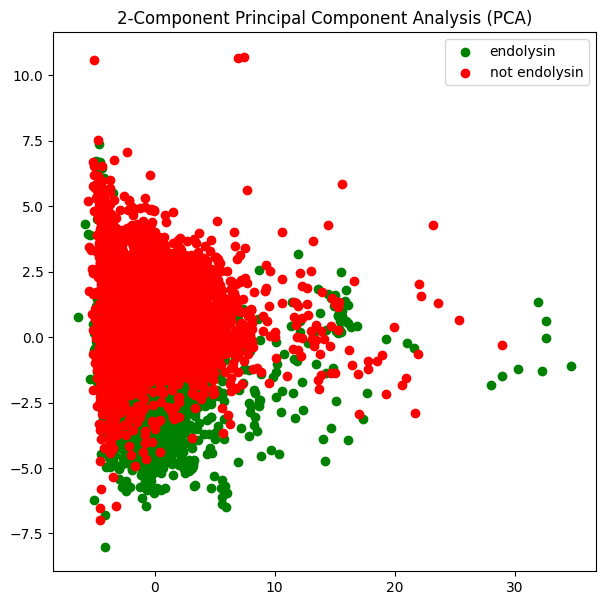

In [11]:
%matplotlib inline

output_var_pca = dataframe.loc[:,'target']
output_values_pca = output_var_pca.unique()

plt.figure()
for c, name in zip('rgby', output_values_pca):
    colors = 'green' if name == 1 else 'red'
    label_name = 'endolysin' if name == 1 else 'not endolysin'
    plt.scatter(X_r_pca[output_var_pca == name, 0], X_r_pca[output_var_pca == name, 1], c=colors, label=label_name)
plt.title('2-Component Principal Component Analysis (PCA)')
plt.legend()
plt.show()

3-Component (3D) Principal Component Analysis (PCA)

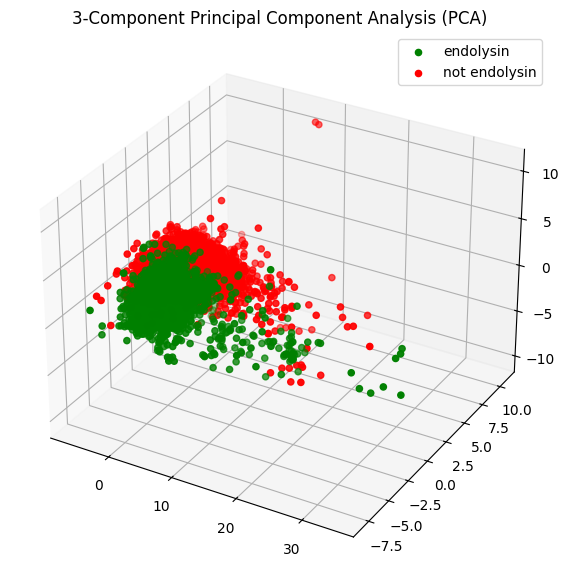

In [12]:
# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for c, name in zip('rgb', output_values_pca):
  colors = 'green' if name == 1 else 'red'
  label_name = 'endolysin' if name == 1 else 'not endolysin'
  # Plot data points in 3D space
  ax.scatter(X_r_pca[output_var_pca == name, 0], X_r_pca[output_var_pca == name, 1], X_r_pca[output_var_pca == name, 2], c=colors, label=label_name)

plt.title('3-Component Principal Component Analysis (PCA)')
plt.legend()
plt.show()


t-distributed Stochastic Neighbor Embedding (t-SNE)

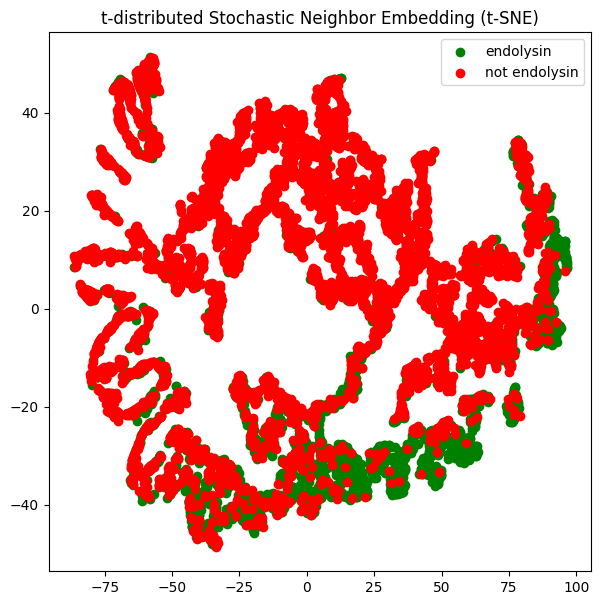

In [13]:
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=50, random_state=0)
X_r_tsne = tsne.fit_transform(dataframe)

# Extract target variable
output_var_tsne = dataframe.loc[:,'target']
output_values_tsne = output_var_tsne.unique()

%matplotlib inline

plt.figure()
for c, name in zip('rgby', output_values_tsne):
  filtered_data = X_r_tsne[output_var_tsne == name]
  colors = 'green' if name == 1 else 'red'
  label_name = 'endolysin' if name == 1 else 'not endolysin'
  plt.scatter(filtered_data[:, 0], filtered_data[:, 1], c=colors, label=label_name)
plt.title('t-distributed Stochastic Neighbor Embedding (t-SNE)')
plt.legend()
plt.show()

K-Means Clustering

[162918.3511012838, 134740.13131685555, 118042.54295776927, 108357.52091877803, 100631.03153026491, 95285.93433391633, 91317.07613691429, 88469.13772249383, 85555.06118061868]


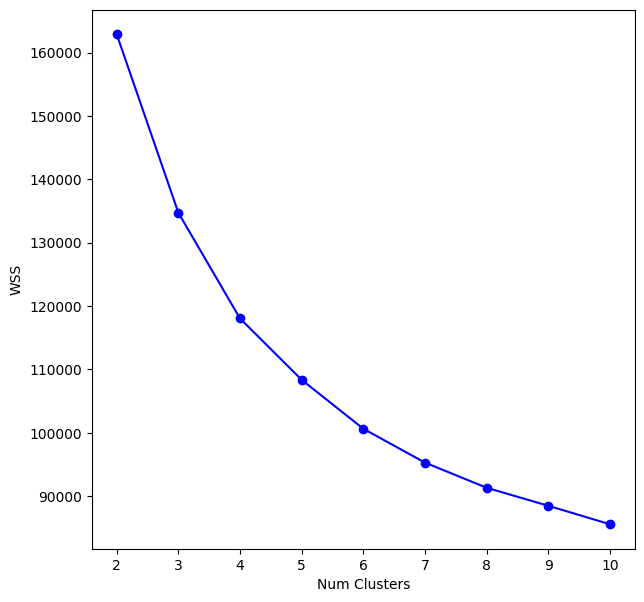

In [14]:
# cálculo do Elbow Method:
ofs = [] # lista para armazenar a inércia de cada modelo de K-means

for k in range(2, 11): # iteração sobre um número de clusters variando de 2 a 10
    kmeans = KMeans(n_clusters=k, n_init = 10) # O parâmetro 'n_init' é definido como 10, o que significa que o algoritmo tentará 10 inicializações e selecionará a melhor baseada no critério interno do K-means
    kmeans.fit(dataframe_scaled) # para cada valor de k, o algoritmo K-means é aplicado aos dados padronizados ('data_sc')
    ofs.append(kmeans.inertia_) # armazenamento da inércia de cada modelo de K-means

print(ofs) # imprimir a lista que contém as inércias para cada número de clusters
# imprimir um gráfico onde o eixo x representa o número de clusters (k) e o eixo y representa a soma dos quadrados dentro do cluster (Within-Cluster Sum of Squares - WSS)
plt.plot(range(2, 11), ofs, 'b-o')
plt.xlabel('Num Clusters')
plt.ylabel('WSS')
plt.show()

In [15]:
# aplicação do K-means com 2 clusters:
kmeans3 = KMeans(n_clusters=2, n_init = 10) # aplicação do algoritmo K-means aos dados padronizados ('data_sc') com 3 clusters
res_kmeans = kmeans3.fit(dataframe_scaled).predict(dataframe_scaled) # o método fit ajusta o modelo aos dados e o predict atribui a cada amostra o rótulo do cluster ao qual ela foi atribuída

# tabela de Contingência (cross-tabulation):
pd.crosstab(dataframe.loc[:,'target'], res_kmeans) # criação de uma tabela de contingência (ou tabela de frequência cruzada)
# esta tabela mostra a contagem de amostras de tecido normal e tumoral para cada um dos clusters obtidos pelo K-means

col_0,0,1
target,,
0,3206,2310
1,626,2132


The following code was adapted from this <a href="https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html">scikit-learn k-means clustering demo</a>.

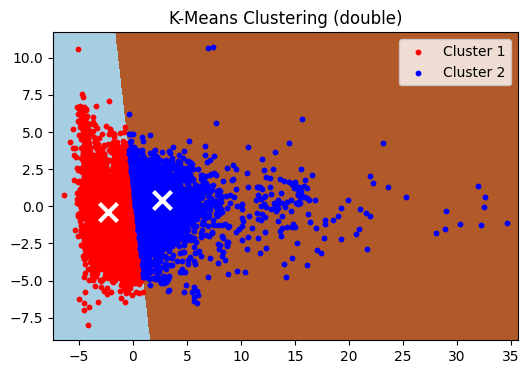

In [16]:
reduced_data = PCA(n_components=2, random_state=0).fit_transform(dataframe_scaled)
kmeans = KMeans(init="k-means++", n_clusters=2, random_state=0, n_init=4)
kmeans.fit(reduced_data)
labels = kmeans.labels_

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(6, 4))
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

# Plot the points with the color corresponding to the cluster they belong to
colors = ['red', 'blue']
for i, color in enumerate(colors):
    plt.scatter(reduced_data[labels == i, 0], reduced_data[labels == i, 1], 
                c=color, s=10, label=f'Cluster {i+1}')

# plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="white",
    zorder=10,
)
plt.title("K-Means Clustering (double)")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
# plt.xticks(())
# plt.yticks(())
plt.legend()
plt.show()

## Supervised Learning

### Logistic Regression model

Now let's create an instance of the learning algorithm that we will use to build the predictive model.

When creating the instance of the learning algorithm, you can immediately define the desired values for some hyperparameters. Hyperparameters are model parameters that are not directly learned during the training phase, but that must be defined *a priori*. When no values are defined for the hyperparameters, they assume the scikit-learn default values.

The values of the hyperparameters can be modified, passing the value you intend to use for a given hyperparameter as an argument when instantiating the learning algorithm:

In [17]:
estimator_logr = LogisticRegression(random_state=0)

Later on, we will evaluate the best values for certain hyperparameters through model selection methods.

The complexity of a model increases with the increase in the number of input attributes, which can lead to overfitting. An overfitting situation occurs when the model fits very well to the training data set, but then fails to generalize well to new examples that were never seen by the model during the training phase. As reducing the number of attributes reduces the complexity of the model, it can be used to try to avoid overfitting the model. It can also improve the learning process by eliminating redundant attributes and can make models easier to analyze and understand.

The following shows how the selection of attributes can be done. SelectKBest is just one possible method. In the <a href="https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection">scikit-learn documentation</a> you will find more feature selection methods.

In [18]:
selector_logr = SelectKBest(f_classif)

The preprocessing and feature selection steps must be applied to the training data and then must be applied in the same way to the test data set. To be able to do this more easily (especially when using methods involving cross-validation), the different steps can be chained together, using a <a href="https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html">scikit-learn pipeline</a>.

In [19]:
pipeline_logr = Pipeline([('selector', selector_logr), ('logr', estimator_logr)])

As an alternative to manually defining the values of each hyperparameter, <a href="https://scikit-learn.org/stable/modules/grid_search.html">hyperparameter optimization</a> methods can be used. Scikit-learn has two methods: GridSearchCV, which tests all possible combinations of the different values chosen for each hyperparameter (which are defined in a search grid), and RandomizedSearchCV, which tests only some random combinations of the search grid values. Both methods evaluate performance through cross-validation.

Here we will demonstrate the use of GridSearchCV. We will use the previously defined pipeline, so we will also be able to evaluate the ideal number of attributes to retain with SelectKBest. First, the hyperparameter grid and the respective values to be tested are defined. As we are using a pipeline, the name of each hyperparameter must be preceded by the step it belongs to in the pipeline (otherwise we would just use the name of the hyperparameter. Then we do the grid search, testing all combinations of the hyperparameters and evaluating each one of the models generated through cross-validation (in this case with 3 folds).

In [20]:
params_to_test_logr = {'selector__k':[25, 20, 15], 'logr__penalty':['l1', 'l2', 'elasticnet']}
grid_search_logr = GridSearchCV(pipeline_logr, params_to_test_logr, cv=3)
grid_search_logr.fit(X_train, y_train)

gs_results_logr = pd.DataFrame.from_dict(data=grid_search_logr.cv_results_)
gs_results_logr

# Save gs_results_logr to a CSV file named 'grid_search_results_logr.csv'
# gs_results_logr.to_csv('grid_search_results_logr.csv', index=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logr__penalty,param_selector__k,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.020084,0.005892,0.000000,0.000000,l1,25,"{'logr__penalty': 'l1', 'selector__k': 25}",NaN,NaN,NaN,NaN,NaN,4
1,0.012911,0.004587,0.000000,0.000000,l1,20,"{'logr__penalty': 'l1', 'selector__k': 20}",NaN,NaN,NaN,NaN,NaN,4
2,0.015625,0.000004,0.000000,0.000000,l1,15,"{'logr__penalty': 'l1', 'selector__k': 15}",NaN,NaN,NaN,NaN,NaN,4
3,0.144422,0.017837,0.006953,0.006493,l2,25,"{'logr__penalty': 'l2', 'selector__k': 25}",0.839979,0.828497,0.839896,0.836124,0.005393,3
4,0.105479,0.007731,0.001665,0.002354,l2,20,"{'logr__penalty': 'l2', 'selector__k': 20}",0.860176,0.830052,0.853886,0.848038,0.012975,1
5,0.172680,0.067670,0.009505,0.004344,l2,15,"{'logr__penalty': 'l2', 'selector__k': 15}",0.857069,0.846114,0.840415,0.847866,0.006911,2
6,0.015206,0.001536,0.000000,0.000000,elasticnet,25,"{'logr__penalty': 'elasticnet', 'selector__k':...",NaN,NaN,NaN,NaN,NaN,4
7,0.016140,0.000824,0.000000,0.000000,elasticnet,20,"{'logr__penalty': 'elasticnet', 'selector__k':...",NaN,NaN,NaN,NaN,NaN,4
8,0.015729,0.000659,0.000000,0.000000,elasticnet,15,"{'logr__penalty': 'elasticnet', 'selector__k':...",NaN,NaN,NaN,NaN,NaN,4


To obtain the best values for the hyperparameters:

In [21]:
grid_search_logr.best_params_

{'logr__penalty': 'l2', 'selector__k': 20}

To use the best combination of hyperparameters in the following steps:

In [22]:
best_pipeline_logr = grid_search_logr.best_estimator_
best_pipeline_logr

Pipeline(steps=[('selector', SelectKBest(k=20)),
                ('logr', LogisticRegression(random_state=0))])

Now we will use cross-validation to evaluate this model with the hyperparameters already optimized. To evaluate the models, several different <a href="https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics">metrics</a> can be used.

In [23]:
scoring_metrics_logr = ['accuracy', 'precision', 'recall', 'f1'] 
# these are just a few metrics options to evaluate models, there are more

cv_scores_logr = cross_validate(best_pipeline_logr, X_train, y_train, scoring=scoring_metrics_logr, cv=5, return_train_score=False)
# the training dataset will be divided into 5 folds. In each iteration, 1 fold will be used as validation set
# and the other 4 folds will be used to train the model

for key, value in cv_scores_logr.items():
    if key != "fit_time" and key != "score_time":
        print("Métrica: %s" % key)
        print("Resultados de cada fold: %s" % value) # resultados de cada fold
        print("Média de todas as folds: %s" % np.mean(value))
        print("Desvio padrão: %s\n" % np.std(value))
    
# In your work, you should save the results of the evaluation of the models you are testing in files

Métrica: test_accuracy
Resultados de cada fold: [0.84987058 0.87823834 0.82642487 0.85233161 0.86355786]
Média de todas as folds: 0.8540846510227833
Desvio padrão: 0.0170823738463779

Métrica: test_precision
Resultados de cada fold: [0.79775281 0.84900285 0.83393502 0.80802292 0.83727811]
Média de todas as folds: 0.8251983410374267
Desvio padrão: 0.019168500646880283

Métrica: test_recall
Resultados de cada fold: [0.7357513  0.77202073 0.5984456  0.73056995 0.73316062]
Média de todas as folds: 0.7139896373056994
Desvio padrão: 0.05972275247012976

Métrica: test_f1
Resultados de cada fold: [0.76549865 0.80868385 0.69683258 0.76734694 0.78176796]
Média de todas as folds: 0.7640259959026426
Desvio padrão: 0.03697905896902629



After evaluating the model, it must be retrained with the complete dataset before being used to make predictions for external test datasets.

In [24]:
# Train the model with the complete dataset:
model_logr = best_pipeline_logr.fit(X_train, y_train)

Now we can use the trained model to predict the output variable (Y) for a new data set (not used during the training/validation phase):

In [25]:
y_test_pred_logr = model_logr.predict(X_test)

To evaluate the model performance:
- Calculate f1, accuracy, precision and recall scores;
- Build the confusion matrix;
- Plot the Receiver Operating Characteristic (ROC) curve and Area Under the Curve (AUC)

f1, accuracy, precision and recall scores:

In [26]:
f1_logr = f1_score(y_test, y_test_pred_logr)
accuracy_logr = accuracy_score(y_test, y_test_pred_logr)
precision_logr = precision_score(y_test, y_test_pred_logr)
recall_logr = recall_score(y_test, y_test_pred_logr)

print("Accuracy:", accuracy_logr) # consider more the accuracy score when the original dataset is balanced i.e. number of positives equals the number of negatives
print("Precision:", precision_logr)
print("Recall:", recall_logr)
print("F1-score:", f1_logr)

Accuracy: 0.8517921868707209
Precision: 0.8018372703412073
Recall: 0.7379227053140096
F1-score: 0.7685534591194969


Confusion matrix:

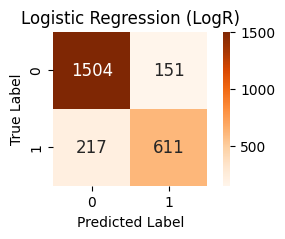

In [27]:
# Build confusion matrix for the test set
cm_logr = confusion_matrix(y_test, y_test_pred_logr)
cm_logr

# Plot confusion matrix for the test set
plt.figure(figsize=(4, 2))
sns.heatmap(cm_logr, annot=True, fmt='d', cmap='Oranges', square=True, annot_kws={"fontsize": 12})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistic Regression (LogR)')
plt.show()

Receiver Operating Characteristic (ROC) curve and Area Under the Curve (AUC):

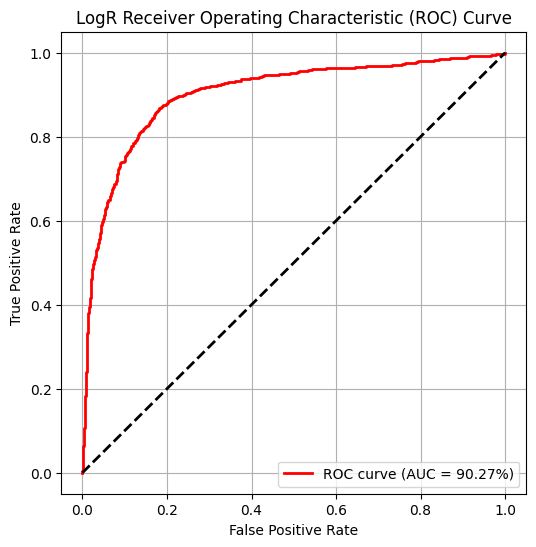

In [28]:
# Make probability predictions on the test set
y_test_pred_prob_logr = model_logr.predict_proba(X_test)[:, 1]  # Obtain probability estimates

# Calculate ROC curve for the test set using probability predictions
fpr_logr, tpr_logr, thresholds_logr = roc_curve(y_test, y_test_pred_prob_logr)
auc_logr = (auc(fpr_logr, tpr_logr) * 100)

# Plot ROC curve for the test set
plt.figure(figsize=(6, 6))
plt.plot(fpr_logr, tpr_logr, color='red', lw=2, label=f'ROC curve (AUC = {auc_logr:.2f}%)')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LogR Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Finally, the model can be <a href=" https://scikit-learn.org/stable/modules/model_persistence.html">saved</a> for future use:

In [29]:
# # #Save the model:
# pickle.dump(model_logr, open('model_logr_double.pkl', 'wb'))

# # #Load the saved model
# loaded_model_logr = pickle.load(open('model_logr_double.pkl', 'rb'))
# loaded_model_logr

Now, let's do the same procedure for other models.

### Random Forest model

In [30]:
estimator_rf = RandomForestClassifier(random_state=0)

In [31]:
selector_rf = SelectKBest(f_classif)

In [32]:
pipeline_rf = Pipeline([('selector', selector_rf), ('rf', estimator_rf)])

In [33]:
params_to_test_rf = {'selector__k':[25, 20, 15], 'rf__n_estimators':[10, 50, 100]}
grid_search_rf = GridSearchCV(pipeline_rf, params_to_test_rf, cv=3)
grid_search_rf.fit(X_train, y_train)

gs_results_rf = pd.DataFrame.from_dict(data=grid_search_rf.cv_results_)
gs_results_rf

# Save gs_results_rf to a CSV file named 'grid_search_results_rf.csv'
# gs_results_rf.to_csv('grid_search_results_rf.csv', index=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rf__n_estimators,param_selector__k,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.420824,0.003786,0.014710,0.000812,10,25,"{'rf__n_estimators': 10, 'selector__k': 25}",0.897462,0.916580,0.902073,0.905372,0.008146,7
1,0.347174,0.016330,0.005870,0.004766,10,20,"{'rf__n_estimators': 10, 'selector__k': 20}",0.890212,0.913472,0.908290,0.903991,0.009970,8
2,0.252384,0.013849,0.007665,0.010840,10,15,"{'rf__n_estimators': 10, 'selector__k': 15}",0.896945,0.916062,0.898446,0.903817,0.008680,9
3,1.830520,0.062260,0.029680,0.009447,50,25,"{'rf__n_estimators': 50, 'selector__k': 25}",0.907820,0.927979,0.920207,0.918669,0.008302,1
4,1.635068,0.025972,0.038298,0.006470,50,20,"{'rf__n_estimators': 50, 'selector__k': 20}",0.909373,0.925389,0.917617,0.917460,0.006539,3
5,1.336041,0.006907,0.036461,0.000951,50,15,"{'rf__n_estimators': 50, 'selector__k': 15}",0.904713,0.925907,0.908808,0.913143,0.009179,6
6,3.633946,0.143539,0.059373,0.006720,100,25,"{'rf__n_estimators': 100, 'selector__k': 25}",0.905748,0.928497,0.914508,0.916251,0.009369,4
7,2.919829,0.155491,0.048525,0.005508,100,20,"{'rf__n_estimators': 100, 'selector__k': 20}",0.907820,0.929016,0.916580,0.917805,0.008696,2
8,2.198492,0.006866,0.059266,0.011248,100,15,"{'rf__n_estimators': 100, 'selector__k': 15}",0.902641,0.926425,0.911917,0.913661,0.009788,5


In [34]:
grid_search_rf.best_params_

{'rf__n_estimators': 50, 'selector__k': 25}

In [35]:
best_pipeline_rf = grid_search_rf.best_estimator_
best_pipeline_rf

Pipeline(steps=[('selector', SelectKBest(k=25)),
                ('rf',
                 RandomForestClassifier(n_estimators=50, random_state=0))])

In [36]:
scoring_metrics_rf = ['accuracy', 'precision', 'recall', 'f1'] 
# these are just a few metrics options to evaluate models, there are more

cv_scores_rf = cross_validate(best_pipeline_rf, X_train, y_train, scoring=scoring_metrics_rf, cv=5, return_train_score=False)
# the training dataset will be divided into 5 folds. In each iteration, 1 fold will be used as validation set
# and the other 4 folds will be used to train the model

for key, value in cv_scores_rf.items():
    if key != "fit_time" and key != "score_time":
        print("Métrica: %s" % key)
        print("Resultados de cada fold: %s" % value) # resultados de cada fold
        print("Média de todas as folds: %s" % np.mean(value))
        print("Desvio padrão: %s\n" % np.std(value))
    
# In your work, you should save the results of the evaluation of the models you are testing in files

Métrica: test_accuracy
Resultados de cada fold: [0.90595341 0.91018998 0.92400691 0.94214162 0.91278066]
Média de todas as folds: 0.9190145158189793
Desvio padrão: 0.013016243826594744

Métrica: test_precision
Resultados de cada fold: [0.86737401 0.87903226 0.9027027  0.92307692 0.87798408]
Média de todas as folds: 0.8900339948059637
Desvio padrão: 0.02015958795814667

Métrica: test_recall
Resultados de cada fold: [0.84715026 0.84715026 0.86528497 0.9015544  0.85751295]
Média de todas as folds: 0.8637305699481865
Desvio padrão: 0.020107365711846882

Métrica: test_f1
Resultados de cada fold: [0.85714286 0.86279683 0.88359788 0.91218873 0.86762779]
Média de todas as folds: 0.876670817655059
Desvio padrão: 0.01982478931442447



In [37]:
# Train the model with the complete dataset:
model_rf = best_pipeline_rf.fit(X_train, y_train)

In [38]:
y_test_pred_rf = model_rf.predict(X_test)

In [39]:
f1_rf = f1_score(y_test, y_test_pred_rf)
accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
precision_rf = precision_score(y_test, y_test_pred_rf)
recall_rf = recall_score(y_test, y_test_pred_rf)

print("Accuracy:", accuracy_rf) # consider more the accuracy score when the original dataset is balanced i.e. number of positives equals the number of negatives
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)

Accuracy: 0.9246878775674587
Precision: 0.909323116219668
Recall: 0.8599033816425121
F1-score: 0.8839230291744258


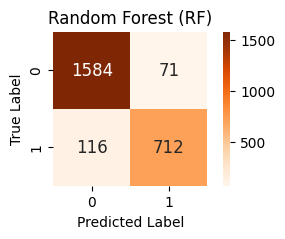

In [40]:
# Build confusion matrix for the test set
cm_rf = confusion_matrix(y_test, y_test_pred_rf)
cm_rf

# Plot confusion matrix for the test set
plt.figure(figsize=(4, 2))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges', square=True, annot_kws={"fontsize": 12})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest (RF)')
plt.show()

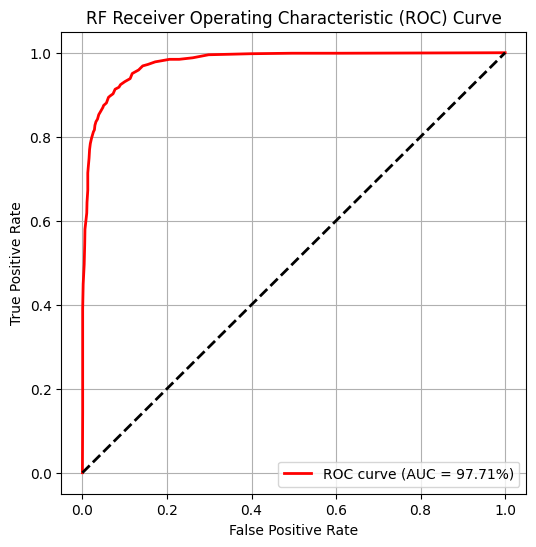

In [41]:
# Make probability predictions on the test set
y_test_pred_prob_rf = model_rf.predict_proba(X_test)[:, 1]  # Obtain probability estimates

# Calculate ROC curve for the test set using probability predictions
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_test_pred_prob_rf)
auc_rf = (auc(fpr_rf, tpr_rf) * 100)

# Plot ROC curve for the test set
plt.figure(figsize=(6, 6))
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label=f'ROC curve (AUC = {auc_rf:.2f}%)')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RF Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [42]:
# # #Save the model:
# pickle.dump(model_rf, open('model_rf_double.pkl', 'wb'))

# # #Load the saved model
# loaded_model_rf = pickle.load(open('model_rf_double.pkl', 'rb'))
# loaded_model_rf

### Support Vector Machine (SVM) model
Since this is a classification problem I opted for using Support Vector Classifier (SVC) model

In [43]:
estimator_svm = SVC(random_state=0)

In [44]:
selector_svm = SelectKBest(f_classif)

In [45]:
pipeline_svm = Pipeline([('selector', selector_svm), ('svc', estimator_svm)])

In [46]:
params_to_test_svm = {'selector__k':[25, 20, 15], 'svc__C':[0.01, 0.1, 1.0]}
grid_search_svm = GridSearchCV(pipeline_svm, params_to_test_svm, cv=3)
grid_search_svm.fit(X_train, y_train)

gs_results_svm = pd.DataFrame.from_dict(data=grid_search_svm.cv_results_)
gs_results_svm

# Save gs_results_svm to a CSV file named 'grid_search_results_svm.csv'
# gs_results_svm.to_csv('grid_search_results_svm.csv', index=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_selector__k,param_svc__C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.416780,0.232268,1.213202,0.301795,25,0.01,"{'selector__k': 25, 'svc__C': 0.01}",0.666494,0.666839,0.666839,0.666724,0.000163,7
1,0.687539,0.020003,0.710346,0.053662,25,0.1,"{'selector__k': 25, 'svc__C': 0.1}",0.790782,0.794819,0.795337,0.793646,0.002036,4
2,0.542926,0.006262,0.550671,0.023913,25,1.0,"{'selector__k': 25, 'svc__C': 1.0}",0.818229,0.821762,0.821762,0.820584,0.001665,2
3,0.787581,0.070313,0.856154,0.126126,20,0.01,"{'selector__k': 20, 'svc__C': 0.01}",0.666494,0.666839,0.666839,0.666724,0.000163,7
4,0.587972,0.019687,0.671755,0.010767,20,0.1,"{'selector__k': 20, 'svc__C': 0.1}",0.791300,0.794301,0.797927,0.794509,0.002710,3
5,0.496364,0.003934,0.535514,0.016505,20,1.0,"{'selector__k': 20, 'svc__C': 1.0}",0.819265,0.821244,0.821762,0.820757,0.001076,1
6,0.811861,0.071933,0.831798,0.045581,15,0.01,"{'selector__k': 15, 'svc__C': 0.01}",0.666494,0.666839,0.666839,0.666724,0.000163,7
7,0.726674,0.060936,0.725850,0.017553,15,0.1,"{'selector__k': 15, 'svc__C': 0.1}",0.676851,0.691192,0.682902,0.683648,0.005878,6
8,0.780558,0.088957,0.812165,0.071677,15,1.0,"{'selector__k': 15, 'svc__C': 1.0}",0.687209,0.704663,0.688601,0.693491,0.007920,5


In [47]:
grid_search_svm.best_params_

{'selector__k': 20, 'svc__C': 1.0}

In [48]:
best_pipeline_svm = grid_search_svm.best_estimator_
best_pipeline_svm

Pipeline(steps=[('selector', SelectKBest(k=20)), ('svc', SVC(random_state=0))])

In [49]:
scoring_metrics_svm = ['accuracy', 'precision', 'recall', 'f1'] 
# these are just a few metrics options to evaluate models, there are more

cv_scores_svm = cross_validate(best_pipeline_svm, X_train, y_train, scoring=scoring_metrics_svm, cv=5, return_train_score=False)
# the training dataset will be divided into 5 folds. In each iteration, 1 fold will be used as validation set
# and the other 4 folds will be used to train the model

for key, value in cv_scores_svm.items():
    if key != "fit_time" and key != "score_time":
        print("Métrica: %s" % key)
        print("Resultados de cada fold: %s" % value) # resultados de cada fold
        print("Média de todas as folds: %s" % np.mean(value))
        print("Desvio padrão: %s\n" % np.std(value))
    
# In your work, you should save the results of the evaluation of the models you are testing in files

Métrica: test_accuracy
Resultados de cada fold: [0.81363244 0.8238342  0.82901554 0.82469775 0.81174439]
Média de todas as folds: 0.8205848648632539
Desvio padrão: 0.006708809303222687

Métrica: test_precision
Resultados de cada fold: [0.77777778 0.80952381 0.79936306 0.79421222 0.76582278]
Média de todas as folds: 0.7893399296172146
Desvio padrão: 0.015609809432387517

Métrica: test_recall
Resultados de cada fold: [0.61658031 0.61658031 0.65025907 0.63989637 0.62694301]
Média de todas as folds: 0.6300518134715026
Desvio padrão: 0.013250478603672988

Métrica: test_f1
Resultados de cada fold: [0.68786127 0.7        0.71714286 0.70875179 0.68945869]
Média de todas as folds: 0.7006429223356267
Desvio padrão: 0.01119707681797711



In [50]:
# Train the model with the complete dataset:
model_svm = best_pipeline_svm.fit(X_train, y_train)

In [51]:
y_test_pred_svm = model_svm.predict(X_test)

In [52]:
f1_svm = f1_score(y_test, y_test_pred_svm)
accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
precision_svm = precision_score(y_test, y_test_pred_svm)
recall_svm = recall_score(y_test, y_test_pred_svm)

print("Accuracy:", accuracy_svm) # consider more the accuracy score when the original dataset is balanced i.e. number of positives equals the number of negatives
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-score:", f1_svm)

Accuracy: 0.8256141763995167
Precision: 0.7866473149492017
Recall: 0.6545893719806763
F1-score: 0.7145682267633487


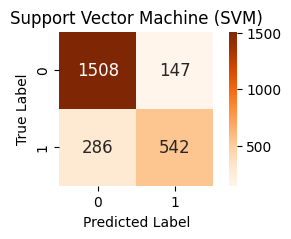

In [53]:
# Build confusion matrix for the test set
cm_svm = confusion_matrix(y_test, y_test_pred_svm)
cm_svm

# Plot confusion matrix for the test set
plt.figure(figsize=(4, 2))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges', square=True, annot_kws={"fontsize": 12})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Support Vector Machine (SVM)')
plt.show()

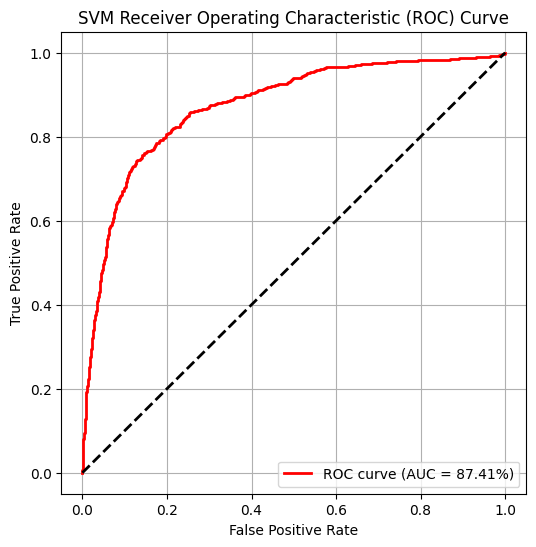

In [54]:
# Make predictions on the test set using decision_function
y_test_pred_prob_svm = model_svm.decision_function(X_test)

# Calculate ROC curve for the test set using probability predictions
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_test_pred_prob_svm)
auc_svm = (auc(fpr_svm, tpr_svm) * 100)

# Plot ROC curve for the test set
plt.figure(figsize=(6, 6))
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label=f'ROC curve (AUC = {auc_svm:.2f}%)')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [55]:
# # #Save the model:
# pickle.dump(model_svm, open('model_svm_double.pkl', 'wb'))

# # #Load the saved model
# loaded_model_svm = pickle.load(open('model_svm_double.pkl', 'rb'))
# loaded_model_svm

### Decision Tree model

In [56]:
estimator_dt = DecisionTreeClassifier(random_state=0)

In [57]:
selector_dt = SelectKBest(f_classif)

In [58]:
pipeline_dt = Pipeline([('selector', selector_dt), ('dt', estimator_dt)])

In [59]:
params_to_test_dt = {'selector__k':[25, 20, 15], 'dt__criterion':['gini', 'entropy', 'log_loss']}
grid_search_dt = GridSearchCV(pipeline_dt, params_to_test_dt, cv=3)
grid_search_dt.fit(X_train, y_train)

gs_results_dt = pd.DataFrame.from_dict(data=grid_search_dt.cv_results_)
gs_results_dt

# Save gs_results_dt to a CSV file named 'grid_search_results_dt.csv'
# gs_results_dt.to_csv('grid_search_results_dt.csv', index=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dt__criterion,param_selector__k,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.225034,0.003841,0.006175,0.006126,gini,25,"{'dt__criterion': 'gini', 'selector__k': 25}",0.863283,0.869948,0.859067,0.864100,0.004479,7
1,0.190805,0.062901,0.006542,0.006627,gini,20,"{'dt__criterion': 'gini', 'selector__k': 20}",0.861730,0.851295,0.852850,0.855292,0.004596,9
2,0.147954,0.003315,0.004911,0.000708,gini,15,"{'dt__criterion': 'gini', 'selector__k': 15}",0.864319,0.870984,0.848187,0.861163,0.009571,8
3,0.187345,0.023952,0.005225,0.007389,entropy,25,"{'dt__criterion': 'entropy', 'selector__k': 25}",0.863283,0.867876,0.872021,0.867727,0.003569,3
4,0.156962,0.013675,0.005209,0.007366,entropy,20,"{'dt__criterion': 'entropy', 'selector__k': 20}",0.859140,0.886010,0.871503,0.872218,0.010981,1
5,0.109672,0.000426,0.005209,0.007366,entropy,15,"{'dt__criterion': 'entropy', 'selector__k': 15}",0.854997,0.873057,0.867876,0.865310,0.007593,5
6,0.194576,0.005840,0.001952,0.001382,log_loss,25,"{'dt__criterion': 'log_loss', 'selector__k': 25}",0.863283,0.867876,0.872021,0.867727,0.003569,3
7,0.166466,0.007229,0.000000,0.000000,log_loss,20,"{'dt__criterion': 'log_loss', 'selector__k': 20}",0.859140,0.886010,0.871503,0.872218,0.010981,1
8,0.117603,0.006694,0.001654,0.002340,log_loss,15,"{'dt__criterion': 'log_loss', 'selector__k': 15}",0.854997,0.873057,0.867876,0.865310,0.007593,5


In [60]:
grid_search_dt.best_params_

{'dt__criterion': 'entropy', 'selector__k': 20}

In [61]:
best_pipeline_dt = grid_search_dt.best_estimator_
best_pipeline_dt

Pipeline(steps=[('selector', SelectKBest(k=20)),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', random_state=0))])

In [62]:
scoring_metrics_dt = ['accuracy', 'precision', 'recall', 'f1'] 
# these are just a few metrics options to evaluate models, there are more

cv_scores_dt = cross_validate(best_pipeline_dt, X_train, y_train, scoring=scoring_metrics_dt, cv=5, return_train_score=False)
# the training dataset will be divided into 5 folds. In each iteration, 1 fold will be used as validation set
# and the other 4 folds will be used to train the model

for key, value in cv_scores_dt.items():
    if key != "fit_time" and key != "score_time":
        print("Métrica: %s" % key)
        print("Resultados de cada fold: %s" % value) # resultados de cada fold
        print("Média de todas as folds: %s" % np.mean(value))
        print("Desvio padrão: %s\n" % np.std(value))
    
# In your work, you should save the results of the evaluation of the models you are testing in files

Métrica: test_accuracy
Resultados de cada fold: [0.86971527 0.89205527 0.85233161 0.87823834 0.88082902]
Média de todas as folds: 0.8746339006439058
Desvio padrão: 0.013239793975853648

Métrica: test_precision
Resultados de cada fold: [0.78588808 0.83896104 0.78364116 0.80856423 0.82291667]
Média de todas as folds: 0.8079942352348979
Desvio padrão: 0.021277693530682252

Métrica: test_recall
Resultados de cada fold: [0.83678756 0.83678756 0.76943005 0.83160622 0.81865285]
Média de todas as folds: 0.8186528497409326
Desvio padrão: 0.025488857774609006

Métrica: test_f1
Resultados de cada fold: [0.81053952 0.83787289 0.77647059 0.81992337 0.82077922]
Média de todas as folds: 0.8131171192443339
Desvio padrão: 0.020334666999728596



In [63]:
# Train the model with the complete dataset:
model_dt = best_pipeline_dt.fit(X_train, y_train)

In [64]:
y_test_pred_dt = model_dt.predict(X_test)

In [65]:
f1_dt = f1_score(y_test, y_test_pred_dt)
accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
precision_dt = precision_score(y_test, y_test_pred_dt)
recall_dt = recall_score(y_test, y_test_pred_dt)

print("Accuracy:", accuracy_dt) # consider more the accuracy score when the original dataset is balanced i.e. number of positives equals the number of negatives
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-score:", f1_dt)

Accuracy: 0.8683044703987113
Precision: 0.7929824561403509
Recall: 0.8188405797101449
F1-score: 0.8057040998217468


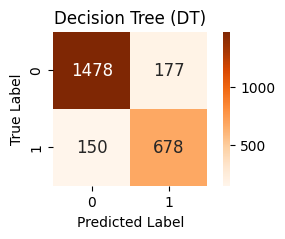

In [66]:
# Build confusion matrix for the test set
cm_dt = confusion_matrix(y_test, y_test_pred_dt)
cm_dt

# Plot confusion matrix for the test set
plt.figure(figsize=(4, 2))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges', square=True, annot_kws={"fontsize": 12})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Decision Tree (DT)')
plt.show()

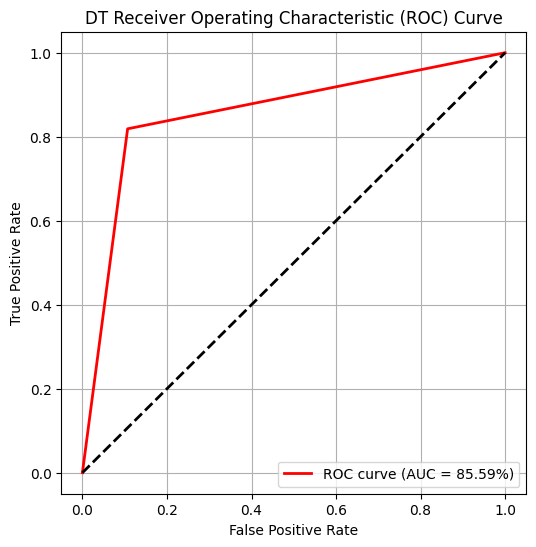

In [67]:
# Make probability predictions on the test set
y_test_pred_prob_dt = model_dt.predict_proba(X_test)[:, 1]  # Obtain probability estimates

# Calculate ROC curve for the test set using probability predictions
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_test_pred_prob_dt)
auc_dt = (auc(fpr_dt, tpr_dt) * 100)

# Plot ROC curve for the test set
plt.figure(figsize=(6, 6))
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, label=f'ROC curve (AUC = {auc_dt:.2f}%)')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DT Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [68]:
# # #Save the model:
# pickle.dump(model_dt, open('model_dt_double.pkl', 'wb'))

# # #Load the saved model
# loaded_model_dt = pickle.load(open('model_dt_double.pkl', 'rb'))
# loaded_model_dt

### Artificial Neural Network (ANN) model

In [69]:
estimator_ann = MLPClassifier(random_state=0)

In [70]:
selector_ann = SelectKBest(f_classif)

In [71]:
pipeline_ann = Pipeline([('selector', selector_ann), ('ann', estimator_ann)])

In [72]:
params_to_test_ann = {'selector__k':[25, 20, 15], 'ann__hidden_layer_sizes':[(10,), (50,), (100,)]}
grid_search_ann = GridSearchCV(pipeline_ann, params_to_test_ann, cv=3)
grid_search_ann.fit(X_train, y_train)

gs_results_ann = pd.DataFrame.from_dict(data=grid_search_ann.cv_results_)
gs_results_ann

# Save gs_results_ann to a CSV file named 'grid_search_results_ann.csv'
# gs_results_ann.to_csv('grid_search_results_ann.csv', index=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ann__hidden_layer_sizes,param_selector__k,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.067493,0.215735,0.006486,0.009172,"(10,)",25,"{'ann__hidden_layer_sizes': (10,), 'selector__...",0.820300,0.793782,0.763212,0.792432,0.023326,3
1,0.738788,0.063565,0.005437,0.000609,"(10,)",20,"{'ann__hidden_layer_sizes': (10,), 'selector__...",0.732781,0.799482,0.724870,0.752378,0.033464,5
2,0.910648,0.294053,0.004608,0.001015,"(10,)",15,"{'ann__hidden_layer_sizes': (10,), 'selector__...",0.779907,0.783938,0.823834,0.795893,0.019826,2
3,0.533158,0.380642,0.005411,0.007652,"(50,)",25,"{'ann__hidden_layer_sizes': (50,), 'selector__...",0.670119,0.729534,0.706736,0.702130,0.024474,8
4,0.593055,0.068262,0.007000,0.006481,"(50,)",20,"{'ann__hidden_layer_sizes': (50,), 'selector__...",0.506473,0.540415,0.747150,0.598013,0.106363,9
5,0.584627,0.152343,0.003214,0.002277,"(50,)",15,"{'ann__hidden_layer_sizes': (50,), 'selector__...",0.800104,0.660622,0.750777,0.737168,0.057751,6
6,0.896991,0.299400,0.002899,0.004100,"(100,)",25,"{'ann__hidden_layer_sizes': (100,), 'selector_...",0.819782,0.794819,0.802591,0.805731,0.010430,1
7,0.777473,0.302629,0.003221,0.002776,"(100,)",20,"{'ann__hidden_layer_sizes': (100,), 'selector_...",0.812532,0.803627,0.583938,0.733366,0.105724,7
8,0.707617,0.058679,0.002784,0.003938,"(100,)",15,"{'ann__hidden_layer_sizes': (100,), 'selector_...",0.790264,0.781865,0.781347,0.784492,0.004087,4


In [73]:
grid_search_ann.best_params_

{'ann__hidden_layer_sizes': (100,), 'selector__k': 25}

In [74]:
best_pipeline_ann = grid_search_ann.best_estimator_
best_pipeline_ann

Pipeline(steps=[('selector', SelectKBest(k=25)),
                ('ann', MLPClassifier(random_state=0))])

In [75]:
scoring_metrics_ann = ['accuracy', 'precision', 'recall', 'f1'] 
# these are just a few metrics options to evaluate models, there are more

cv_scores_ann = cross_validate(best_pipeline_ann, X_train, y_train, scoring=scoring_metrics_ann, cv=5, return_train_score=False)
# the training dataset will be divided into 5 folds. In each iteration, 1 fold will be used as validation set
# and the other 4 folds will be used to train the model

for key, value in cv_scores_ann.items():
    if key != "fit_time" and key != "score_time":
        print("Métrica: %s" % key)
        print("Resultados de cada fold: %s" % value) # resultados de cada fold
        print("Média de todas as folds: %s" % np.mean(value))
        print("Desvio padrão: %s\n" % np.std(value))
    
# In your work, you should save the results of the evaluation of the models you are testing in files

Métrica: test_accuracy
Resultados de cada fold: [0.68766178 0.83851468 0.7582038  0.81692573 0.44041451]
Média de todas as folds: 0.708344099865735
Desvio padrão: 0.14382931952857053

Métrica: test_precision
Resultados de cada fold: [0.78571429 0.72979215 0.90769231 0.66992188 0.37003968]
Média de todas as folds: 0.6926320597504562
Desvio padrão: 0.17937540383530073

Métrica: test_recall
Resultados de cada fold: [0.08549223 0.81865285 0.30569948 0.88860104 0.96632124]
Média de todas as folds: 0.6129533678756476
Desvio padrão: 0.3509367390398365

Métrica: test_f1
Resultados de cada fold: [0.15420561 0.77167277 0.45736434 0.76391982 0.53515065]
Média de todas as folds: 0.5364626375370125
Desvio padrão: 0.22778905888557993



In [76]:
# Train the model with the complete dataset:
model_ann = best_pipeline_ann.fit(X_train, y_train)

In [77]:
y_test_pred_ann = model_ann.predict(X_test)

In [78]:
f1_ann = f1_score(y_test, y_test_pred_ann)
accuracy_ann = accuracy_score(y_test, y_test_pred_ann)
precision_ann = precision_score(y_test, y_test_pred_ann)
recall_ann = recall_score(y_test, y_test_pred_ann)

print("Accuracy:", accuracy_ann) # consider more the accuracy score when the original dataset is balanced i.e. number of positives equals the number of negatives
print("Precision:", precision_ann)
print("Recall:", recall_ann)
print("F1-score:", f1_ann)

Accuracy: 0.7684252919855014
Precision: 0.6093344857389801
Recall: 0.8514492753623188
F1-score: 0.7103274559193955


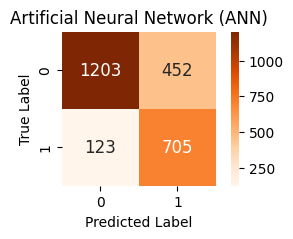

In [79]:
# Build confusion matrix for the test set
cm_ann = confusion_matrix(y_test, y_test_pred_ann)
cm_ann

# Plot confusion matrix for the test set
plt.figure(figsize=(4, 2))
sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Oranges', square=True, annot_kws={"fontsize": 12})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Artificial Neural Network (ANN)')
plt.show()

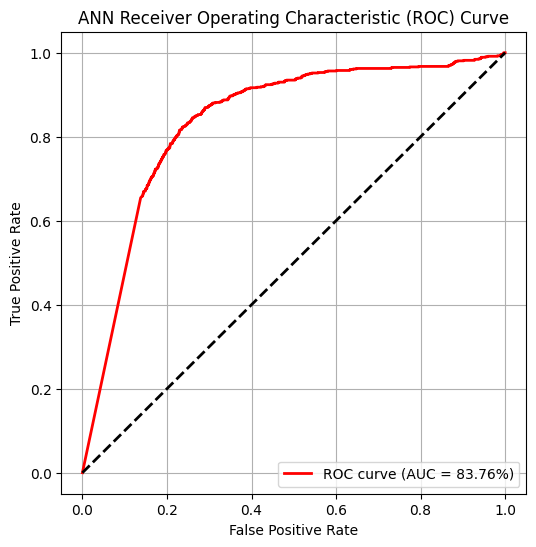

In [80]:
# Make probability predictions on the test set
y_test_pred_prob_ann = model_ann.predict_proba(X_test)[:, 1]  # Obtain probability estimates

# Calculate ROC curve for the test set using probability predictions
fpr_ann, tpr_ann, thresholds_ann = roc_curve(y_test, y_test_pred_prob_ann)
auc_ann = (auc(fpr_ann, tpr_ann) * 100)

# Plot ROC curve for the test set
plt.figure(figsize=(6, 6))
plt.plot(fpr_ann, tpr_ann, color='red', lw=2, label=f'ROC curve (AUC = {auc_ann:.2f}%)')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ANN Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [81]:
# # #Save the model:
# pickle.dump(model_ann, open('model_ann_double.pkl', 'wb'))

# # #Load the saved model
# loaded_model_ann = pickle.load(open('model_ann_double.pkl', 'rb'))
# loaded_model_ann

### Combined score metrics:

In [82]:
# function to convert a score into percentage
def percentage(score):
    return f"{round(score * 100)}%"

# Define evaluation metrics
eval_metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Logistic Regression': [percentage(accuracy_logr), percentage(precision_logr), percentage(recall_logr), percentage(f1_logr)],
    'Random Forest': [percentage(accuracy_rf), percentage(precision_rf), percentage(recall_rf), percentage(f1_rf)],
    'SVM': [percentage(accuracy_svm), percentage(precision_svm), percentage(recall_svm), percentage(f1_svm)],
    'Decision Tree': [percentage(accuracy_dt), percentage(precision_dt), percentage(recall_dt), percentage(f1_dt)],
    'ANN': [percentage(accuracy_ann), percentage(precision_ann), percentage(recall_ann), percentage(f1_ann)],
}

# Create DataFrame for metrics comparisons between models
test_metrics_df = pd.DataFrame(eval_metrics)                # Create DataFrame for test set
test_metrics_df.set_index('Metric', inplace=True)           # Set 'Metric' column as index
test_metrics_df

,Logistic Regression,Random Forest,SVM,Decision Tree,ANN
Metric,,,,,
Accuracy,85%,92%,83%,87%,77%
Precision,80%,91%,79%,79%,61%
Recall,74%,86%,65%,82%,85%
F1-Score,77%,88%,71%,81%,71%


### Combined ROC curves:

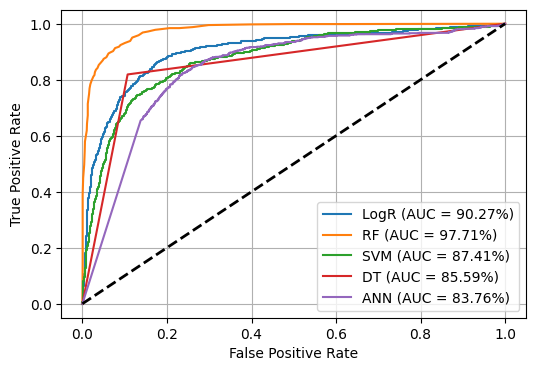

In [83]:
# Define models and their corresponding ROC curve data
models = ['LogR', 'RF', 'SVM', 'DT', 'ANN']
fprs = [fpr_logr, fpr_rf, fpr_svm, fpr_dt, fpr_ann]
tprs = [tpr_logr, tpr_rf, tpr_svm, tpr_dt, tpr_ann]
aucs = [auc_logr, auc_rf, auc_svm, auc_dt, auc_ann]

# Plot combined ROC curves
plt.figure(figsize=(6, 4))
for model, fpr, tpr, auc in zip(models, fprs, tprs, aucs):
    plt.plot(fpr, tpr, label=f'{model} (AUC = {auc:.2f}%)')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curves (Double)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()